In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import files
from google.colab import drive
# uploaded = files.upload()

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_set = '/content/drive/MyDrive/sliit/labtest1'

In [ ]:
import tensorflow as tf
from tensorflow import keras


In [ ]:
batch_size = 32
image_size = (124, 124)

datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Adjust the validation split as needed.
)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/sliit/labtest1',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/sliit/labtest1',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)
train_generator[1]

Found 537 images belonging to 5 classes.
Found 131 images belonging to 5 classes.


(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [0.98823535, 0.98823535, 0.98823535],
          [0.92549026, 0.92549026, 0.92549026]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [0.98823535, 0.98823535, 0.98823535],
          [0.92549026, 0.92549026, 0.92549026]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [0.98823535, 0.98823535, 0.98823535],
          [0.92549026, 0.92549026, 0.92549026]],
 
         ...,
 
         [[0.9960785 , 0.9960785 , 0.9960785 ],
          [0.99607

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(124, 124, 3), padding= 'valid'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu',padding= 'valid'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', padding= 'valid'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='softmax')  # 5 output classes for the chess pieces.
])


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator,
                    epochs=10,  # Adjust the number of epochs.
                    validation_data=validation_generator)


Epoch 1/10
17/17 [==============================] - 19s 1s/step - loss: 1.6089 - accuracy: 0.2775 - val_loss: 1.5568 - val_accuracy: 0.2901
Epoch 2/10
17/17 [==============================] - 18s 1s/step - loss: 1.4928 - accuracy: 0.3482 - val_loss: 1.4177 - val_accuracy: 0.3969
Epoch 3/10
17/17 [==============================] - 20s 1s/step - loss: 1.3268 - accuracy: 0.4451 - val_loss: 1.2299 - val_accuracy: 0.5420
Epoch 4/10
17/17 [==============================] - 20s 1s/step - loss: 1.1312 - accuracy: 0.5512 - val_loss: 1.1023 - val_accuracy: 0.6183
Epoch 5/10
17/17 [==============================] - 18s 1s/step - loss: 0.8956 - accuracy: 0.6909 - val_loss: 1.1626 - val_accuracy: 0.5802
Epoch 6/10
17/17 [==============================] - 19s 1s/step - loss: 0.7124 - accuracy: 0.7318 - val_loss: 1.2075 - val_accuracy: 0.6183
Epoch 7/10
17/17 [==============================] - 18s 1s/step - loss: 0.5096 - accuracy: 0.8324 - val_loss: 1.1851 - val_accuracy: 0.6489
Epoch 8/10
17/17 [==

In [ ]:
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)


5/5 [==============================] - 1s 199ms/step - loss: 1.5198 - accuracy: 0.6336
Validation loss: 1.5197625160217285
Validation accuracy: 0.6335877776145935


In [ ]:
predictions = model.predict(validation_generator)


5/5 [==============================] - 2s 353ms/step


In [ ]:
batch = next(train_generator)

In [ ]:
images, labels = batch

# Access the first image in the batch (batch_size=32 in your case)
first_image = images[0]

# You can also access the corresponding label for this image
first_label = labels[0]


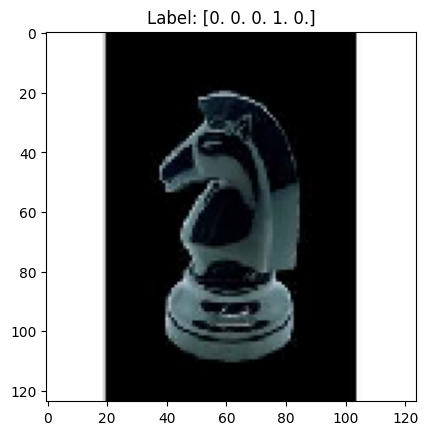

In [ ]:
import matplotlib.pyplot as plt

# Display the first image in the batch
plt.imshow(first_image)
plt.title("Label: {}".format(first_label))  # Display the label as the title
plt.show()

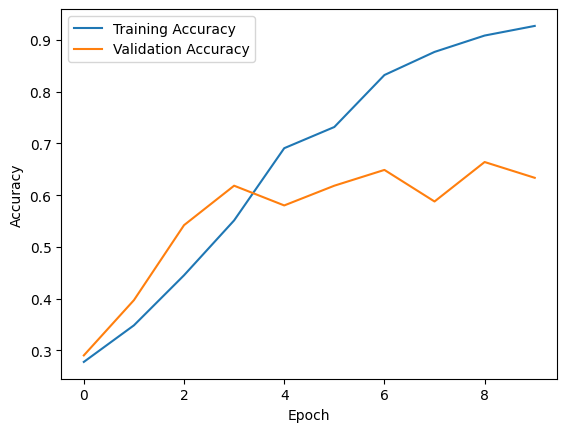

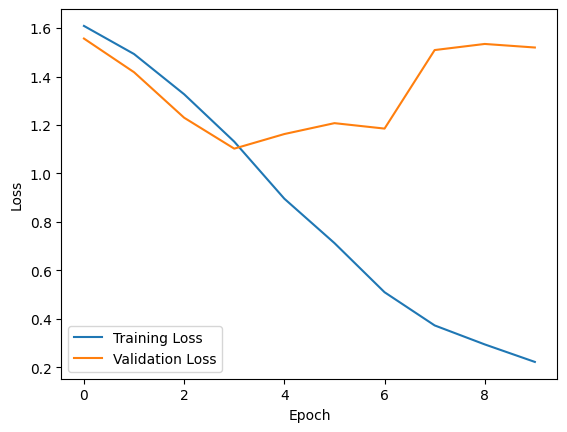

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()